<a href="https://colab.research.google.com/github/marcinwolter/NumericalAnalysis2020/blob/master/lab9_differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Differentiation** - calculating the first derivative and the higher order derivatives

In [0]:
import numpy as np

# Define the finite step
h = 0.01

# Define method
method = 'central'

# Set range for plotting
x_min = -2
x_max =  8

# Define function
def f(x):
    return 1+(1/2)*np.tanh(x)


In [0]:

# First derivative
def first_c(f,a,method='central',h=0.01):
    '''Compute the difference formula for f'(a) with step size h.

    Parameters
    ----------
    f : function
    a : number
        Compute derivative at x = a
    method : string
        Difference formula: 'forward', 'backward' or 'central'
    h : number
        Step size in difference formula

    Returns
    -------
    float
        Difference formula:
            central: f(a+h) - f(a-h))/2h
            forward: f(a+h) - f(a))/h
            backward: f(a) - f(a-h))/h            
    '''
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")


In [0]:

# Second derivative
def second_c(f,a,method='central',h=0.01):

    if method == 'central':
        return (first_c(f,a + h,method,h) - first_c(f,a - h,method,h))/(2*h)
    elif method == 'forward':
        return (first_c(f,a + h,method,h) - first_c(f,a,method,h))/h
    elif method == 'backward':
        return (first_c(f,a,method,h) - first_c(f,a - h,method,h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")


In [0]:

# Third derivative
def third_c(f,a,method='central',h=0.01):

    if method == 'central':
        return (second_c(f,a + h,method,h) - second_c(f,a - h,method,h))/(2*h)
    elif method == 'forward':
        return (second_c(f,a + h,method,h) - second_c(f,a,method,h))/h
    elif method == 'backward':
        return (second_c(f,a,method,h) - second_c(f,a - h,method,h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")



# **Print the function and it's derivatives**

In [0]:


print("Using central difference: \n")
print("     x       function     first_c      secind_c              third_c")

for x in range(x_min,x_max):
    print(x, f(x), first_c(f,x,method,h), second_c(f,x,method,h), third_c(f,x,method,h))



Using central difference: 

     x       function     first_c      secind_c              third_c
-2 0.5179862099620915 0.03532751790103483 0.06811650019256099 0.1263413744040376
-1 0.6192029220221176 0.2099923507978163 0.31983891634668193 0.31067442472776374
0 1.0 0.4999833339999704 0.0 -0.999600147252866
1 1.3807970779778824 0.2099923507978163 -0.31983891634668193 0.31067442471388595
2 1.4820137900379085 0.03532751790102928 -0.06811650019256099 0.12634137444567095
3 1.4975273768433652 0.0049333425897857275 -0.009818517464621479 0.019443715804090544
4 1.4996646498695334 0.0006705199508516557 -0.001340229270896387 0.002677037896914314
5 1.4999546021312975 9.079766671860057e-05 -0.0001815909406177596 0.0003631400735670809
6 1.4999938558253978 1.2289092898853937e-05 -2.457952230638938e-05 4.916117513076301e-05
7 1.4999991684719722 1.6631655497256759e-06 -3.3265468157850364e-06 6.653483319851716e-06


# **Plot the function and it's derivatives**

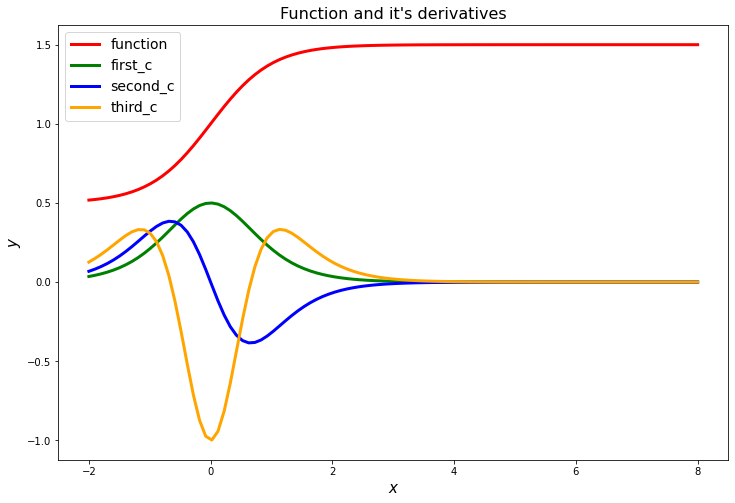

In [0]:
# Plot the function and it's derivatives
import matplotlib.pyplot as plt


plt.figure(figsize=(12,8))
plt.title("Function and it's derivatives",fontsize=16) 

xlin = np.linspace(x_min, x_max, num=100)
plt.plot(xlin,f(xlin),linewidth=3,color='red',linestyle='solid', label="function")
plt.plot(xlin,first_c(f,xlin,method,h),linewidth=3,color='green',linestyle='solid', label="first_c")
plt.plot(xlin,second_c(f,xlin,method,h),linewidth=3,color='blue',linestyle='solid', label="second_c")
plt.plot(xlin,third_c(f,xlin,method,h),linewidth=3,color='orange',linestyle='solid', label="third_c")


plt.legend(prop={'size':14})

plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',fontsize=15);

    
plt.show()